In [1]:
text = '''But Google is starting from behind. The company made a late push into hardware, 
          and Apple’s Siri, available on iPhones, and Amazon’s Alexa software, which runs 
          on its Echo and Dot devices, have clear leads in consumer adoption. I was born 
          in India on 23/03/1996. Chennai is a coastal city.'''

# NLTK - NER

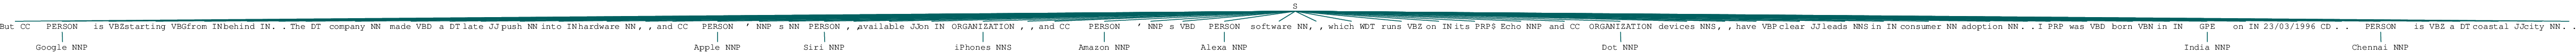

In [5]:
from nltk import word_tokenize, pos_tag, ne_chunk

# use by graph show
import os
path_to_gs = "/usr/local/Cellar/ghostscript/9.52/bin/"
os.environ['PATH'] += os.pathsep + path_to_gs

tokens = word_tokenize(text)
pos_nltk = pos_tag(tokens)
ne_nltk = ne_chunk(pos_nltk)
ne_nltk

# Spacy -NER

In [8]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()
doc = nlp(text)
for ent in doc.ents:
    print(ent, ent.label_)
    

Google ORG
Apple ORG
Siri NORP
iPhones ORG
Amazon ORG
Alexa ORG
Echo LOC
Dot ORG
India GPE
23/03/1996 DATE


In [9]:
doc.ents

(Google, Apple, Siri, iPhones, Amazon, Alexa, Echo, Dot, India, 23/03/1996)

In [10]:
doc.is_parsed

True

# Polyglot - NER

In [ ]:
!pip install PyICU
!pip install pycld2
!

In [18]:
import polyglot 

poly_text = Text(text)
print(poly_text.entities)

ModuleNotFoundError: No module named 'polyglot'

# Gensim

In [11]:
import gensim

In [13]:
corpus = [[(0, 1.0), (1, 1.0), (2, 1.0)],
           [(2,1.0), (3,1.0), (4,1.0), (5,1.0), (6,1.0), (8,1.0)],
           [(1, 1.0), (3, 1.0), (4, 1.0), (7, 1.0)],
           [(0, 1.0), (4, 1.0), (7, 1.0)],
           [(3, 1.0), (5, 1.0), (6, 1.0)],
           [(9, 1.0)],
           [(9, 1.0), (10, 1.0)],
           [(9, 1.0), (10, 1.0), (11, 1.0)],
           [(8, 1.0), (10, 1.0), (11, 1.0)]]

tfidf = gensim.models.TfidfModel(corpus)
sample_doc = [(0, 1), (4, 1)]
print(tfidf[sample_doc])

[(0, 0.8075244024440723), (4, 0.5898341626740045)]


In [16]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)

sims = index[tfidf[sample_doc]]
print(list(enumerate(sims)))

[(0, 0.4662244), (1, 0.19139354), (2, 0.2460055), (3, 0.778005), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]
